In [1]:
#Import pandas, matplotlib.pyplot, and seaborn in the correct lines below
import pandas as pd, numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import datetime


In [2]:
#import csv file candidate_test_funnel_data.csv
khan_data = pd.read_csv('candidate_test_funnel_data.csv')

In [3]:
khan_data.info

<bound method DataFrame.info of                             timestamp              user_id  \
0      2016-02-18 18:05:34.408245 UTC      461023995001001   
1      2016-02-18 18:05:35.156166 UTC      461023995001001   
2      2016-02-18 18:05:44.033396 UTC      461023995001001   
3      2016-02-18 18:06:39.681943 UTC      461023995001001   
4      2016-02-18 18:06:55.040427 UTC      461023995001001   
...                               ...                  ...   
31476  2016-02-17 04:55:55.155721 UTC  9217430421418490001   
31477  2016-02-17 04:57:49.804066 UTC  9217430421418490001   
31478  2016-02-17 05:03:19.589196 UTC  9217430421418490001   
31479  2016-02-16 23:43:20.321764 UTC  9221580505017320001   
31480  2016-02-17 01:39:34.913221 UTC  9222385809595909001   

                session_id country language  user_registered_flag device_type  \
0      7269247775762971847      US       en                  True     desktop   
1      7269247775762971847      US       en                  

In [4]:
khan_data.describe()

,user_id,session_id
count,3.148100e+04,3.148100e+04
mean,4.741758e+18,-2.084473e+17
std,2.723067e+18,5.221850e+18
min,4.610240e+14,-9.223230e+18
25%,2.429468e+18,-4.494871e+18
50%,4.776607e+18,-2.735810e+17
75%,7.068635e+18,4.268337e+18
max,9.222386e+18,9.214357e+18


In [5]:
khan_data.head(5)

,timestamp,user_id,session_id,country,language,user_registered_flag,device_type,KA_app_flag,OS,product,domain,subject,topic,tutorial,mission,URI,conversion,video_slug,video_title
0,2016-02-18 18:05:34.408245 UTC,461023995001001,7269247775762971847,US,en,True,desktop,False,Windows,NaN,NaN,NaN,NaN,NaN,NaN,NaN,login,NaN,NaN
1,2016-02-18 18:05:35.156166 UTC,461023995001001,7269247775762971847,US,en,True,desktop,False,Windows,NaN,NaN,NaN,NaN,NaN,NaN,NaN,homepage_view,NaN,NaN
2,2016-02-18 18:05:44.033396 UTC,461023995001001,7269247775762971847,US,en,True,desktop,False,Windows,NaN,NaN,NaN,NaN,NaN,NaN,"""/welcome""",pageview,NaN,NaN
3,2016-02-18 18:06:39.681943 UTC,461023995001001,7269247775762971847,US,en,True,desktop,False,Windows,NaN,NaN,NaN,NaN,NaN,NaN,"""/math/cc-third-grade-math""",pageview,NaN,NaN
4,2016-02-18 18:06:55.040427 UTC,461023995001001,7269247775762971847,US,en,True,desktop,False,Windows,NaN,NaN,NaN,NaN,NaN,NaN,"""/mission/cc-third-grade-math""",pageview,NaN,NaN


In [6]:
#Data Exploration - Number of pissing values by column
missing = pd.DataFrame([khan_data.isnull().sum(), 100 * khan_data.isnull().mean()])
missing.sort_values(by='user_id', ascending=False)
missing = missing.transpose()
missing.columns=['count', '%']
missing

,count,%
timestamp,0.0,0.000000
user_id,0.0,0.000000
session_id,0.0,0.000000
country,0.0,0.000000
language,0.0,0.000000
user_registered_flag,0.0,0.000000
device_type,0.0,0.000000
KA_app_flag,0.0,0.000000
OS,0.0,0.000000
product,27252.0,86.566500


In [7]:
# Columns of product, domain, subject, topic, tutorial, mission, video_slug, and video_tile have significant missing values 
# data of over 70% thus they will be dropped from the dataset
khan_data.drop(columns=['product','domain','subject','topic','tutorial','mission','video_slug','video_title'],inplace=True)

In [8]:
khan_data.head()

,timestamp,user_id,session_id,country,language,user_registered_flag,device_type,KA_app_flag,OS,URI,conversion
0,2016-02-18 18:05:34.408245 UTC,461023995001001,7269247775762971847,US,en,True,desktop,False,Windows,NaN,login
1,2016-02-18 18:05:35.156166 UTC,461023995001001,7269247775762971847,US,en,True,desktop,False,Windows,NaN,homepage_view
2,2016-02-18 18:05:44.033396 UTC,461023995001001,7269247775762971847,US,en,True,desktop,False,Windows,"""/welcome""",pageview
3,2016-02-18 18:06:39.681943 UTC,461023995001001,7269247775762971847,US,en,True,desktop,False,Windows,"""/math/cc-third-grade-math""",pageview
4,2016-02-18 18:06:55.040427 UTC,461023995001001,7269247775762971847,US,en,True,desktop,False,Windows,"""/mission/cc-third-grade-math""",pageview


In [9]:
#Add columns 'date' and 'time' by splitting the date and time for the time stamp
khan_data['dates'] = pd.to_datetime(khan_data['timestamp']).dt.date
khan_data['time'] = pd.to_datetime(khan_data['timestamp']).dt.time

In [10]:
khan_data.head(3)

,timestamp,user_id,session_id,country,language,user_registered_flag,device_type,KA_app_flag,OS,URI,conversion,dates,time
0,2016-02-18 18:05:34.408245 UTC,461023995001001,7269247775762971847,US,en,True,desktop,False,Windows,NaN,login,2016-02-18,18:05:34.408245
1,2016-02-18 18:05:35.156166 UTC,461023995001001,7269247775762971847,US,en,True,desktop,False,Windows,NaN,homepage_view,2016-02-18,18:05:35.156166
2,2016-02-18 18:05:44.033396 UTC,461023995001001,7269247775762971847,US,en,True,desktop,False,Windows,"""/welcome""",pageview,2016-02-18,18:05:44.033396


In [11]:
khan_data.dtypes

timestamp               object
user_id                  int64
session_id               int64
country                 object
language                object
user_registered_flag      bool
device_type             object
KA_app_flag               bool
OS                      object
URI                     object
conversion              object
dates                   object
time                    object
dtype: object

In [12]:
khan_data['dates'] = pd.to_datetime(khan_data['dates'])

In [13]:
khan_data.dtypes

timestamp                       object
user_id                          int64
session_id                       int64
country                         object
language                        object
user_registered_flag              bool
device_type                     object
KA_app_flag                       bool
OS                              object
URI                             object
conversion                      object
dates                   datetime64[ns]
time                            object
dtype: object

In [14]:
khan_data.head(3)

,timestamp,user_id,session_id,country,language,user_registered_flag,device_type,KA_app_flag,OS,URI,conversion,dates,time
0,2016-02-18 18:05:34.408245 UTC,461023995001001,7269247775762971847,US,en,True,desktop,False,Windows,NaN,login,2016-02-18,18:05:34.408245
1,2016-02-18 18:05:35.156166 UTC,461023995001001,7269247775762971847,US,en,True,desktop,False,Windows,NaN,homepage_view,2016-02-18,18:05:35.156166
2,2016-02-18 18:05:44.033396 UTC,461023995001001,7269247775762971847,US,en,True,desktop,False,Windows,"""/welcome""",pageview,2016-02-18,18:05:44.033396


In [15]:
#Adding an 'month' and 'year' column, just in case it is necessary later
khan_data['month'] = khan_data['dates'].dt.month
khan_data['year'] = khan_data['dates'].dt.year

In [16]:
khan_data.head(3)

,timestamp,user_id,session_id,country,language,user_registered_flag,device_type,KA_app_flag,OS,URI,conversion,dates,time,month,year
0,2016-02-18 18:05:34.408245 UTC,461023995001001,7269247775762971847,US,en,True,desktop,False,Windows,NaN,login,2016-02-18,18:05:34.408245,2,2016
1,2016-02-18 18:05:35.156166 UTC,461023995001001,7269247775762971847,US,en,True,desktop,False,Windows,NaN,homepage_view,2016-02-18,18:05:35.156166,2,2016
2,2016-02-18 18:05:44.033396 UTC,461023995001001,7269247775762971847,US,en,True,desktop,False,Windows,"""/welcome""",pageview,2016-02-18,18:05:44.033396,2,2016


In [17]:
#Double checking missing value percentages and it all looks good, only URI is a small concern with 16.9% missing
missing = pd.DataFrame([khan_data.isnull().sum(), 100 * khan_data.isnull().mean()])
missing.sort_values(by='user_id', ascending=False)
missing = missing.transpose()
missing.columns=['count', '%']
missing

,count,%
timestamp,0.0,0.0000
user_id,0.0,0.0000
session_id,0.0,0.0000
country,0.0,0.0000
language,0.0,0.0000
user_registered_flag,0.0,0.0000
device_type,0.0,0.0000
KA_app_flag,0.0,0.0000
OS,0.0,0.0000
URI,5332.0,16.9372


In [18]:
# Verify the columns that are objects
khan_data.select_dtypes('object')

,timestamp,country,language,device_type,OS,URI,conversion,time
0,2016-02-18 18:05:34.408245 UTC,US,en,desktop,Windows,NaN,login,18:05:34.408245
1,2016-02-18 18:05:35.156166 UTC,US,en,desktop,Windows,NaN,homepage_view,18:05:35.156166
2,2016-02-18 18:05:44.033396 UTC,US,en,desktop,Windows,"""/welcome""",pageview,18:05:44.033396
3,2016-02-18 18:06:39.681943 UTC,US,en,desktop,Windows,"""/math/cc-third-grade-math""",pageview,18:06:39.681943
4,2016-02-18 18:06:55.040427 UTC,US,en,desktop,Windows,"""/mission/cc-third-grade-math""",pageview,18:06:55.040427
...,...,...,...,...,...,...,...,...
31476,2016-02-17 04:55:55.155721 UTC,US,en,phone,iOS,"""/math/integral-calculus/integration-technique...",pageview,04:55:55.155721
31477,2016-02-17 04:57:49.804066 UTC,US,en,phone,iOS,NaN,video_started,04:57:49.804066
31478,2016-02-17 05:03:19.589196 UTC,US,en,phone,iOS,NaN,video_completed,05:03:19.589196
31479,2016-02-16 23:43:20.321764 UTC,US,en,desktop,Windows,"""/science/chemistry/chemical-reactions-stoichi...",pageview,23:43:20.321764


In [19]:
# Check if OS is just Windows, IOS, and Mac OS X
khan_data['OS'].value_counts()
#OS is Windows, Mac OS X, Chrome, IOS, and Android as the top 5

Windows          17124
Mac OS X          5505
Chrome OS         3739
iOS               2966
Android           1504
Ubuntu             439
Linux              180
Windows Phone       14
Other                7
BlackBerry OS        3
Name: OS, dtype: int64

In [20]:
# Check if country is only US
khan_data['country'].value_counts()
# we have USA, Canada, Ireland, Great Britain, and Brazil as the top 5

US    21973
CA     1842
IE     1049
GB      649
BR      617
      ...  
CI        2
GR        2
AM        1
MA        1
DO        1
Name: country, Length: 77, dtype: int64

In [21]:
# Check if language is only en
khan_data['language'].value_counts()
# we have english, spanish, portuguese norwegian, and polish as the top 5

en         29697
es           904
pt           620
nb           161
pl            38
tr            24
da            19
fr            11
th             4
zh-HANS        2
de             1
Name: language, dtype: int64

In [22]:
# Distrobution of unqiue URI and Conversion
khan_data[['URI', 'conversion']].nunique()

URI           7329
conversion       6
dtype: int64

In [23]:
# observe the conversion (type of activity) column
khan_data['conversion'].value_counts()
# We already know that all values in conversion are filled and its nice to see there are 6 unique values for it

pageview           26149
video_started       2799
video_completed     1423
login                765
homepage_view        220
registration         125
Name: conversion, dtype: int64

In [24]:
# URI (path of pageview) has 7,329 unique values , lets observe the top 20 values
khan_data['URI'].value_counts().head(20)

"/"                                              2640
"/profile"                                       1736
"/search"                                         554
"/mission/math"                                   475
"/mission/cc-sixth-grade-math"                    452
"/mission/cc-third-grade-math"                    448
"/mission/algebra"                                431
"/mission/cc-seventh-grade-math"                  411
"/mission/cc-eighth-grade-math"                   390
"/mission/early-math"                             379
"/mission/cc-fifth-grade-math"                    359
"/mission/cc-fourth-grade-math"                   325
"/mission/arithmetic"                             320
"/computing/computer-programming"                 290
"/computing/computer-programming/browse"          276
"/welcome"                                        209
"/mission/pre-algebra"                            170
"/computing/computer-programming/programming"     142
"/mission/sat"              

In [25]:
# / has the greatest value and am not sure of what it signifies. The next higest of "/profile" 
# shows people logging into their profile

### Remember 16.9% of URI is NaN, debating on signifcance of the URI column and will discuss with Yuna ###

#The values are too diverse to input/fill any values 

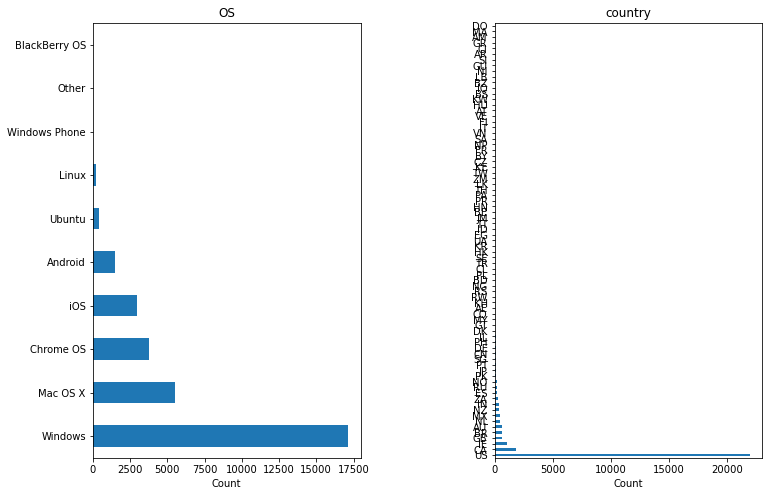

In [27]:
# Conversion is of interest as it shows what the user is doing per a session, thus, 
# analyze the distrobution of conversion on OS and country
fig, ax = plt.subplots(1, 2, figsize=(12,8))
# OS
khan_data.OS.value_counts().plot(kind='barh', ax=ax[0])
ax[0].set_title('OS')
ax[0].set_xlabel('Count')

# country
khan_data.country.value_counts().plot(kind='barh', ax=ax[1])
ax[1].set_title('country')
ax[1].set_xlabel('Count')


#Give the subplots a little "breathing room" with a wspace of 0.5
plt.subplots_adjust(wspace=0.5);

In [ ]:
# We can see that the majoirty is Windows users and desktop usage is greater than mobile usage
# US is by far the biggest country to using Khan with Canada being a faraway second

In [28]:
# user_id should be looked at lastly as the values repeat, checking for number of unique values 
khan_data[['user_id']].nunique()

user_id    1664
dtype: int64

In [29]:
khan_data['user_id'].value_counts().head(20)

6700738932649094001    962
5991144387626157001    960
3592083520406841001    414
780040238317029001     392
6956704960789543001    371
8584499678653463001    371
4067962852358803001    294
1528985320524694001    282
1312488934647287001    261
1526578723024217001    230
8379266864292405001    216
3189531367086897001    209
7121094560810586001    205
2299220307677654001    202
1117616218360859001    195
8815392193141107001    195
8230684565656460001    188
2836258172236817001    180
5059945143700077001    177
4325212730846925001    164
Name: user_id, dtype: int64

In [ ]:
# We can see that some users are very active with their user id appearing multiple times,
# Now need to set up data so that users returning is defined as retention 

In [32]:
user_counts = khan_data['user_id'].value_counts()
khan_data[khan_data['user_id'].isin(user_counts.index[user_counts>1])]

,timestamp,user_id,session_id,country,language,user_registered_flag,device_type,KA_app_flag,OS,URI,conversion,dates,time,month,year
0,2016-02-18 18:05:34.408245 UTC,461023995001001,7269247775762971847,US,en,True,desktop,False,Windows,NaN,login,2016-02-18,18:05:34.408245,2,2016
1,2016-02-18 18:05:35.156166 UTC,461023995001001,7269247775762971847,US,en,True,desktop,False,Windows,NaN,homepage_view,2016-02-18,18:05:35.156166,2,2016
2,2016-02-18 18:05:44.033396 UTC,461023995001001,7269247775762971847,US,en,True,desktop,False,Windows,"""/welcome""",pageview,2016-02-18,18:05:44.033396,2,2016
3,2016-02-18 18:06:39.681943 UTC,461023995001001,7269247775762971847,US,en,True,desktop,False,Windows,"""/math/cc-third-grade-math""",pageview,2016-02-18,18:06:39.681943,2,2016
4,2016-02-18 18:06:55.040427 UTC,461023995001001,7269247775762971847,US,en,True,desktop,False,Windows,"""/mission/cc-third-grade-math""",pageview,2016-02-18,18:06:55.040427,2,2016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31474,2016-02-17 04:50:44.80639 UTC,9217430421418490001,4776485044606531534,US,en,False,phone,False,iOS,NaN,video_started,2016-02-17,04:50:44.806390,2,2016
31475,2016-02-17 04:54:24.951925 UTC,9217430421418490001,4776485044606531534,US,en,False,phone,False,iOS,NaN,video_completed,2016-02-17,04:54:24.951925,2,2016
31476,2016-02-17 04:55:55.155721 UTC,9217430421418490001,4776485044606531534,US,en,False,phone,False,iOS,"""/math/integral-calculus/integration-technique...",pageview,2016-02-17,04:55:55.155721,2,2016
31477,2016-02-17 04:57:49.804066 UTC,9217430421418490001,4776485044606531534,US,en,False,phone,False,iOS,NaN,video_started,2016-02-17,04:57:49.804066,2,2016


In [ ]:
# Around 300 rows were removed, these rows are those that the user does not return
# we can see that the data logs each action, thus, session id is repeated discuss with Yuna next steps 
# on seperating retention

In [33]:
# observing unique session id
khan_data[['session_id']].nunique()

session_id    3328
dtype: int64

In [ ]:
# unique user_id = 1664 , unique session_id = 3328
# We can see that users are returing on average 2x
# need to create column where 

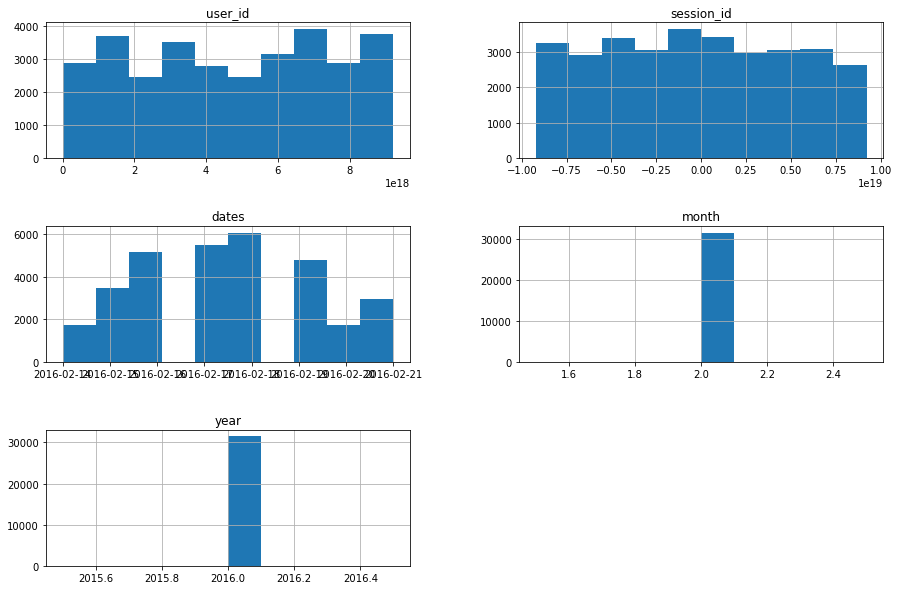

In [36]:
#Distrobution of features
khan_data.hist(figsize=(15,10))
plt.subplots_adjust(hspace=0.5)

In [ ]:
# Can see that all the data is from Feburary 2016 so this is truely a one month snapshot